
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 

* This is be a classification problem.
* Because there are only two discrete outcomes:
  * Students who need early intervention.
  * Students who do not need early intervention.

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [30]:
# Import libraries
import numpy as np
import pandas as pd

In [31]:
# Read student data
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [32]:
df=pd.read_csv('/content/gdrive/MyDrive/ICTAK/student-data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes


### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [33]:
# Calculate number of students
n_students = df.shape[0]

In [34]:
# Calculate number of features
n_features = df.shape[1]

In [35]:
# Calculate passing students
n_passed = len(df[df['passed']=='yes'])

In [36]:
# Calculate failing students
n_failed = len(df[df['passed']=='no'])

In [37]:
# Calculate graduation rate
grad_rate = round((n_passed / (n_passed+n_failed)) *100, 2)

In [38]:
# Print the results
print('The total number of students, n_students =', n_students)
print('The total number of features for each student, n_features =', n_features)
print('The number of those students who passed, n_passed =', n_passed)
print('The number of those students who failed, n_failed =', n_failed)
print('The graduation rate of the class, grad_rate, in percent (%) =', grad_rate)

The total number of students, n_students = 395
The total number of features for each student, n_features = 31
The number of those students who passed, n_passed = 265
The number of those students who failed, n_failed = 130
The graduation rate of the class, grad_rate, in percent (%) = 67.09


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [39]:
# Extract feature columns

In [40]:
feature_cols = list(df.columns[:-1])
feature_cols

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [41]:
# Extract target column 'passed'

In [42]:
target_col = df.columns[-1]
target_col

'passed'

In [43]:
# Separate the data into feature data and target data (X and y, respectively)

In [44]:
X = df[feature_cols]
y = df[target_col]
print('Feature data:\n',X)
print('Target data:\n',y)

Feature data:
     school sex  age address famsize  ... goout  Dalc  Walc health absences
0       GP   F   18       U     GT3  ...     4     1     1      3        6
1       GP   F   17       U     GT3  ...     3     1     1      3        4
2       GP   F   15       U     LE3  ...     2     2     3      3       10
3       GP   F   15       U     GT3  ...     2     1     1      5        2
4       GP   F   16       U     GT3  ...     2     1     2      5        4
..     ...  ..  ...     ...     ...  ...   ...   ...   ...    ...      ...
390     MS   M   20       U     LE3  ...     4     4     5      4       11
391     MS   M   17       U     LE3  ...     5     3     4      2        3
392     MS   M   21       R     GT3  ...     3     3     3      3        3
393     MS   M   18       R     LE3  ...     1     3     4      5        0
394     MS   M   19       U     LE3  ...     3     3     3      5        5

[395 rows x 30 columns]
Target data:
 0       no
1       no
2      yes
3      yes
4 

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [45]:
X = pd.get_dummies(X)
X

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
391,17,3,1,2,1,0,2,4,5,3,4,2,3,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,3,3,3,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
393,18,3,2,3,1,0,4,4,1,3,4,5,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0


### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size = 95, random_state=42)

In [54]:
# Show the results of the split
print('X_train:',X_train.shape[0])
print('X_test:',X_test.shape[0])

X_train: 300
X_test: 95


### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

* Support Vector Machine

  _“Support Vector Machine” (SVM) is a supervised machine learning algorithm that can be used for both classification or regression challenges.In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well \._ 
  * Pros:
    * It works really well with a clear margin of separation
    * It is effective in high dimensional spaces.
    * It is effective in cases where the number of dimensions is greater than the number of samples.
    * It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
  * Cons:
    * It doesn’t perform well when we have large data set because the required training time is higher
    * It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
    * SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is included in the related SVC method of Python scikit-learn library.

* Logistic Regression

_Logistic regression is a classification algorithm used to find the probability of event success and event failure. It is used when the dependent variable is binary(0/1, True/False, Yes/No) in nature. It supports categorizing data into discrete classes by studying the relationship from a given set of labelled data._
  * Pros:
    * Logistic regression is easier to implement, interpret, and very efficient to train.
    * It makes no assumptions about distributions of classes in feature space.
    * It can easily extend to multiple classes(multinomial regression) and a natural probabilistic view of class predictions.
  * Cons:
    * If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.
    * It constructs linear boundaries.
    * The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables.

* K-NN

_K- Nearest Neighbors or also known as K-NN belong to the family of supervised machine learning algorithms which means we use labeled (Target Variable) dataset to predict the class of new data point. The K-NN algorithm is a robust classifier which is often used as a benchmark for more complex classifiers such as Artificial Neural Network (ANN) or Support vector machine (SVM)._

  * Pros:    
    * **K-NN is pretty intuitive and simple:** K-NN algorithm is very simple to understand and equally easy to implement. To classify the new data point K-NN algorithm reads through whole dataset to find out K nearest neighbors.
    * **K-NN has no assumptions:** K-NN is a non-parametric algorithm which means there are assumptions to be met to implement K-NN. Parametric models like linear regression has lots of assumptions to be met by data before it can be implemented which is not the case with K-NN.
    * **No Training Step:** K-NN does not explicitly build any model, it simply tags the new data entry based learning from historical data. New data entry would be tagged with majority class in the nearest neighbor.
    * **It constantly evolves:** Given it’s an instance-based learning; k-NN is a memory-based approach. The classifier immediately adapts as we collect new training data. It allows the algorithm to respond quickly to changes in the input during real-time use.
  * Cons:
    * **K-NN slow algorithm:** K-NN might be very easy to implement but as dataset grows efficiency or speed of algorithm declines very fast.
    * **Curse of Dimensionality:** KNN works well with small number of input variables but as the numbers of variables grow K-NN algorithm struggles to predict the output of new data point.
    * **K-NN needs homogeneous features:** If you decide to build k-NN using a common distance, like Euclidean or Manhattan distances, it is completely necessary that features have the same scale, since absolute differences in features weight the same, i.e., a given distance in feature 1 must means the same for feature 2.
    * **Optimal number of neighbors:** One of the biggest issues with K-NN is to choose the optimal number of neighbors to be consider while classifying the new data entry.

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

Model  | Real-world Application | Strength | Weakness | Reason to choose
------------------------------------------|-------------------|-------------------|-------------------|-------------------|
Logistic Regression | Cancer prediction based on patient characteristics | predictions on small datasets </br> small number of features </br> with this can be efficient and fast | When data contains features with </br> complexity,  unless the features are </br> carefully selected and finetuned this </br> may suffer from under / over - fitting | This model may be suitable since the expected output </br>is categorical and binary on top |
K-NN | Applications that call for pattern recognition </br> to determine outcome (Including recognizing </br> faces of people in pictures) | Simplest and yet effective </br> (facial recognition !!) | It is instance-based and lazy learning.</br>  It is sensitive to the local structure of the data | With 56 total features and 395 observations, k-NN will certainly </br> be manageable computationally |
SVM | SVMs allow Text and hypertext categorization </br> for both inductive and transductive models. They </br> use training data to classify documents into </br> different categories.  | Text and hypertext categorization | SVM algorithm is not suitable for large data sets. </br> SVM does not perform very well when </br> the data set has more noise i.e. </br> target classes are overlapping. | Here, we have only one target class and is not overlapping.</br>  Hence we can use SVM |

In [55]:
# Import the three supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# fit model-1  on traning data 

In [79]:
svm = SVC(kernel='rbf') 
svm.fit(X_train, y_train)

SVC()

In [ ]:
# predict on the test data 

In [80]:
predictions=svm.predict(X_test)

In [ ]:
# calculate the accuracy score

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy on training set:', round(svm.score(X_train, y_train),2))
print('Accuracy on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy on training set: 0.67
Accuracy on test set: 0.67
Precision score on test set: 0.34
Recall score on test set: 0.5
F1 score on test set: 0.4


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions=logreg.predict(X_test)
print('Accuracy on training set:', round(logreg.score(X_train, y_train),2))
print('Accuracy on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy on training set: 0.78
Accuracy on test set: 0.64
Precision score on test set: 0.58
Recall score on test set: 0.57
F1 score on test set: 0.57


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions=knn.predict(X_test)
print('Accuracy on training set:', round(knn.score(X_train, y_train),2))
print('Accuracy on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy on training set: 0.79
Accuracy on test set: 0.69
Precision score on test set: 0.64
Recall score on test set: 0.61
F1 score on test set: 0.61


##**Summary:**
Model  | Accuracy on Training set | Accuracy on Test set | Precision score | Recall score | F1 score
------------------------------------------|-------------------|-------------------|-------------------|-------------------|-------------------|
SVM | 0.67 | 0.67 | 0.34 | 0.5 | 0.4 |
Logistic Regression | 0.78 | 0.64 | 0.58 | 0.57 | 0.57 |
K-NN | 0.79 | 0.69 | 0.64 | 0.61 | 0.61 |

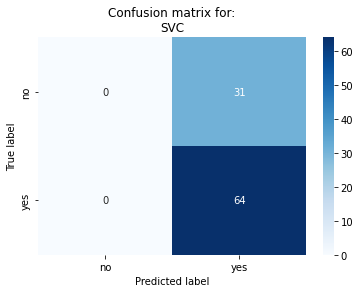

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = svm
cm = confusion_matrix(y_test.values, model.predict(X_test))
    # view with a heatmap
fig = plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));
plt.show()

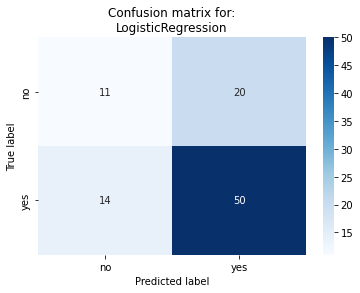

In [83]:
model = logreg
cm = confusion_matrix(y_test.values, model.predict(X_test))
    # view with a heatmap
fig = plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));
plt.show()

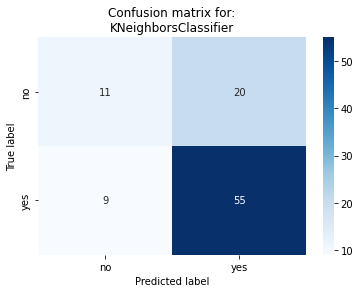

In [84]:
model = knn
cm = confusion_matrix(y_test.values, model.predict(X_test))
    # view with a heatmap
fig = plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));
plt.show()